---

### S&P 500 Evaluation & Portfolio Optimization

In [39]:
# Import required libraries and dependencies
from pathlib import Path
import seaborn as sns
import pandas as pd
import bs4 as bs
import datetime as dt
import os
from pandas_datareader import data as pdr
import pickle
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np

In [40]:
# Itdentify current S&P Tickers from Wikipedia
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

In [41]:
# Store S&P 500 tickers & pull data from July 1, 2019 through today
yf.pdr_override()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2019, 7, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

save_sp500_tickers()
get_data_from_yahoo()


MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
ADS
Already have ADS
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Already have AOS
APA
Already have APA
AIV
Alre

In [42]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                   MMM        ABT       ABBV        ABMD         ACN  \
Date                                                                   
2019-07-01  168.236160  83.134003  68.268700  265.019989  184.521378   
2019-07-02  167.763763  83.586617  69.040672  261.489990  186.229645   
2019-07-03  168.689255  84.265549  69.719627  261.329987  188.569839   
2019-07-05  165.816376  84.049072  67.887352  261.470001  188.984573   
2019-07-08  163.107407  83.724373  66.241096  257.779999  187.918152   

                 ATVI        ADBE        AMD         AAP        AES  ...  \
Date                                                                 ...   
2019-07-01  47.189640  300.970001  31.200001  155.488846  16.224052  ...   
2019-07-02  47.666504  301.390015  31.240000  158.666321  16.398190  ...  

In [43]:
sp500_data = Path("sp500_joined_closes.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [44]:
# Sort the dataframe based on Date index, & display a few rows to validate 
sp500_df.sort_index(ascending=True,inplace=True)
sp500_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,168.236160,83.134003,68.268700,265.019989,184.521378,47.189640,300.970001,31.200001,155.488846,16.224052,...,127.842575,57.907276,34.662178,119.219955,83.307114,107.579842,208.979996,116.385406,44.789215,112.914780
2019-07-02,167.763763,83.586617,69.040672,261.489990,186.229645,47.666504,301.390015,31.240000,158.666321,16.398190,...,129.517929,58.608826,34.088299,115.726509,82.083321,108.965256,211.610001,115.809982,43.358429,113.928894
2019-07-03,168.689255,84.265549,69.719627,261.329987,188.569839,48.342064,305.700012,31.190001,159.500427,16.717447,...,129.917282,59.154476,34.891727,114.535797,82.241226,109.043854,217.529999,116.722733,43.861137,114.674568
2019-07-05,165.816376,84.049072,67.887352,261.470001,188.984573,47.835396,303.980011,31.500000,159.490479,16.562658,...,129.362076,59.134987,34.853470,114.260246,81.757629,108.316765,217.039993,116.881462,44.673203,113.521263
2019-07-08,163.107407,83.724373,66.241096,257.779999,187.918152,46.166374,302.920013,32.040001,157.077591,16.591679,...,129.605576,59.290886,34.107430,114.083115,80.632523,108.130089,210.440002,119.748695,43.812801,113.441727


In [45]:
# Calculate daily returns for ~TTM of every stock in the S&P500
daily_returns = sp500_df.pct_change().dropna()
daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,-0.091775,-0.087248,-0.031523,-0.071169,-0.054006,-0.038426,-0.039576,-0.005274,-0.127254,0.080073,...,0.115715,-0.126918,-0.057847,-0.047707,-0.070897,-0.072204,-0.030745,-0.035450,-0.061284,-0.013583
2020-03-23,-0.056209,-0.076176,-0.062772,0.014022,-0.041683,0.084918,0.040394,0.051250,0.046248,0.000000,...,0.107754,-0.012443,-0.020669,0.001948,-0.054266,-0.026860,-0.048277,-0.060130,-0.058640,-0.082029
2020-03-24,0.125986,0.109360,0.046356,0.085613,0.091586,-0.036125,0.008885,0.109990,0.100382,0.066554,...,0.156158,0.081000,0.088144,0.068194,0.094633,0.232484,0.057580,0.155798,0.045681,0.119793
2020-03-25,-0.008891,0.015210,0.006223,0.022412,-0.032069,-0.028661,-0.013194,-0.034401,0.046191,0.012638,...,0.127704,0.027752,0.062179,-0.024574,0.030000,0.046081,0.031459,0.036724,0.026608,0.042887
2020-03-26,0.035274,0.071519,0.087174,0.015522,0.128573,0.091734,0.054787,0.064306,0.074693,0.053042,...,-0.047295,0.042484,0.056391,0.070115,0.064986,0.039522,0.060570,0.044104,0.058801,0.089641


In [46]:
# Calculate annualized volatility & sort, used to identify the 20 that will be removed
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(ascending=False,inplace=True)
volatility.head(50)

NCLH    1.755942
RCL     1.480617
AAL     1.452118
CCL     1.448868
UAL     1.370091
ADS     1.354614
GPS     1.350233
APA     1.330239
HWM     1.322511
COTY    1.307192
KSS     1.302579
LB      1.261456
DXC     1.218966
PVH     1.218628
OXY     1.214754
JWN     1.196631
NBL     1.181643
BA      1.174047
MGM     1.162659
LNC     1.143053
SPG     1.089363
TPR     1.072922
DFS     1.062130
HAL     1.055489
HOG     1.049543
FANG    1.034802
DAL     1.015821
MPC     1.010772
DVN     1.006774
ALK     0.997049
WYNN    0.984395
DRI     0.978972
FTI     0.972189
MRO     0.966866
SYF     0.963156
MHK     0.960203
IVZ     0.958218
KIM     0.955523
HFC     0.952323
OKE     0.948599
CARR    0.947772
UNM     0.934689
FITB    0.928957
LEG     0.928731
SLG     0.927035
VTR     0.925499
VLO     0.923542
VIAC    0.913261
COF     0.911466
LEN     0.898958
dtype: float64

In [47]:
# Drop 20 stocks with the highest volatility in daily returns
ra_daily_returns = daily_returns.drop(columns=['NCLH', 'RCL', 'AAL', 'CCL', 'UAL','ADS','GPS','APA','HWM','COTY','KSS','LB','DXC','PVH','OXY','JWN','NBL','BA','MGM','LNC'])
ra_daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,-0.091775,-0.087248,-0.031523,-0.071169,-0.054006,-0.038426,-0.039576,-0.005274,-0.127254,0.080073,...,0.115715,-0.126918,-0.057847,-0.047707,-0.070897,-0.072204,-0.030745,-0.035450,-0.061284,-0.013583
2020-03-23,-0.056209,-0.076176,-0.062772,0.014022,-0.041683,0.084918,0.040394,0.051250,0.046248,0.000000,...,0.107754,-0.012443,-0.020669,0.001948,-0.054266,-0.026860,-0.048277,-0.060130,-0.058640,-0.082029
2020-03-24,0.125986,0.109360,0.046356,0.085613,0.091586,-0.036125,0.008885,0.109990,0.100382,0.066554,...,0.156158,0.081000,0.088144,0.068194,0.094633,0.232484,0.057580,0.155798,0.045681,0.119793
2020-03-25,-0.008891,0.015210,0.006223,0.022412,-0.032069,-0.028661,-0.013194,-0.034401,0.046191,0.012638,...,0.127704,0.027752,0.062179,-0.024574,0.030000,0.046081,0.031459,0.036724,0.026608,0.042887
2020-03-26,0.035274,0.071519,0.087174,0.015522,0.128573,0.091734,0.054787,0.064306,0.074693,0.053042,...,-0.047295,0.042484,0.056391,0.070115,0.064986,0.039522,0.060570,0.044104,0.058801,0.089641


In [48]:
# Set weight of stocks within the portfolio [currently equally weighted] & calculate the product of the portfolio's daily return
weights = []
for ticker in ra_daily_returns:
    weights.append(1/len(ra_daily_returns.columns))
ra_portfolio_returns = ra_daily_returns.dot(weights)
ra_portfolio_returns.head()

Date
2020-03-20   -0.042800
2020-03-23   -0.036681
2020-03-24    0.110041
2020-03-25    0.028786
2020-03-26    0.061928
dtype: float64

In [49]:
# Calculate cumulative portfolio returns
ra_cumulative_returns = (1 + ra_portfolio_returns).cumprod()
ra_cumulative_returns.head()

Date
2020-03-20    0.957200
2020-03-23    0.922090
2020-03-24    1.023558
2020-03-25    1.053022
2020-03-26    1.118234
dtype: float64

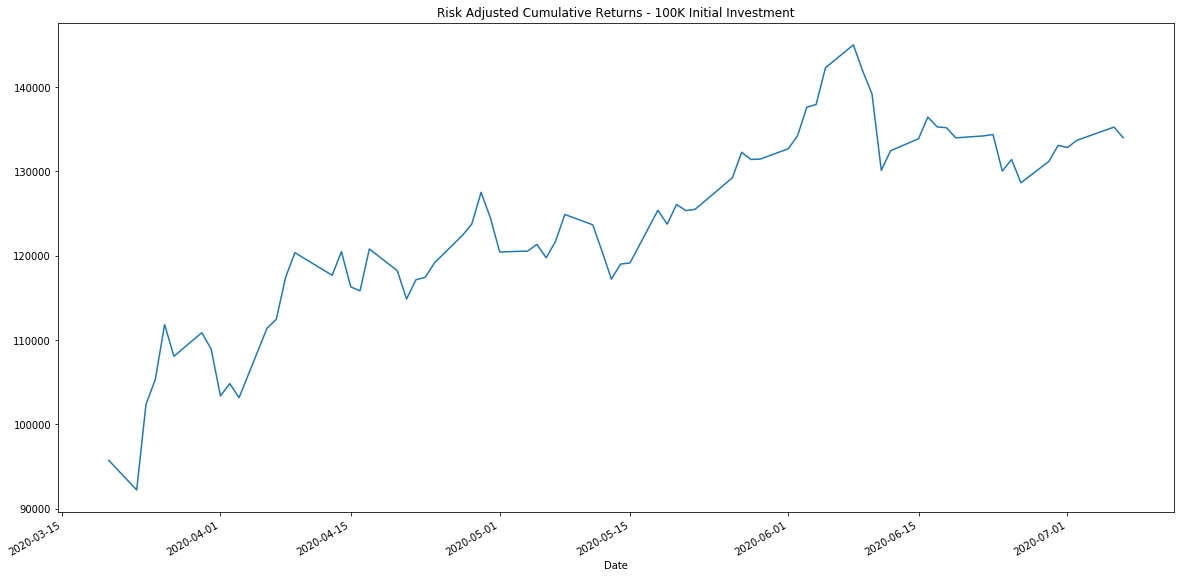

In [50]:
# Plot the portfolio returns - assuming an initial investment of $100,000
initial_investment = 100000
ra_cumulative_profit = initial_investment * ra_cumulative_returns
ra_cumulative_profit.plot(kind='line',figsize=(20,10),title='Risk Adjusted Cumulative Returns - 100K Initial Investment');

---

In [51]:
# Re-calculate daily returns, revert back to original dataset
daily_returns = sp500_df.pct_change().dropna()
daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,-0.091775,-0.087248,-0.031523,-0.071169,-0.054006,-0.038426,-0.039576,-0.005274,-0.127254,0.080073,...,0.115715,-0.126918,-0.057847,-0.047707,-0.070897,-0.072204,-0.030745,-0.035450,-0.061284,-0.013583
2020-03-23,-0.056209,-0.076176,-0.062772,0.014022,-0.041683,0.084918,0.040394,0.051250,0.046248,0.000000,...,0.107754,-0.012443,-0.020669,0.001948,-0.054266,-0.026860,-0.048277,-0.060130,-0.058640,-0.082029
2020-03-24,0.125986,0.109360,0.046356,0.085613,0.091586,-0.036125,0.008885,0.109990,0.100382,0.066554,...,0.156158,0.081000,0.088144,0.068194,0.094633,0.232484,0.057580,0.155798,0.045681,0.119793
2020-03-25,-0.008891,0.015210,0.006223,0.022412,-0.032069,-0.028661,-0.013194,-0.034401,0.046191,0.012638,...,0.127704,0.027752,0.062179,-0.024574,0.030000,0.046081,0.031459,0.036724,0.026608,0.042887
2020-03-26,0.035274,0.071519,0.087174,0.015522,0.128573,0.091734,0.054787,0.064306,0.074693,0.053042,...,-0.047295,0.042484,0.056391,0.070115,0.064986,0.039522,0.060570,0.044104,0.058801,0.089641


In [52]:
# Calculate the annualized sharpe ratio on the S&P 500
sharpe_ratios = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
sharpe_ratios.sort_values(axis=0,ascending=True,inplace=True)
sharpe_ratios.head(50)

HWM     -0.752096
WBA     -0.475184
ED      -0.404706
MSI     -0.352640
CINF    -0.292315
PBCT    -0.288614
JWN     -0.263004
TAP     -0.246519
BIIB    -0.224857
WFC     -0.164087
TIF     -0.139168
L       -0.078668
XRX      0.004354
SJM      0.025660
KR       0.089432
DISCA    0.113525
GILD     0.117852
T        0.166069
DISCK    0.178571
MTB      0.186891
EQR      0.189505
HRB      0.232568
NI       0.241281
NLSN     0.254439
WEC      0.259319
HII      0.334078
CTL      0.352243
RL       0.370553
HRL      0.388213
ATO      0.389940
AEP      0.397842
AEE      0.409268
OMC      0.411863
HPE      0.447811
RJF      0.450183
XYL      0.485232
NOC      0.496397
COO      0.511528
D        0.514433
BRK-B    0.527842
SLG      0.528294
SO       0.536985
TPR      0.572109
VZ       0.584133
GE       0.589985
WAT      0.593812
PSA      0.604706
COST     0.616733
BXP      0.617673
CPB      0.638467
dtype: float64

In [53]:
# Drop 10% of S&P 500 with lowest Sharpe ratios to create the Diversified, Optimized Portfolio
op_daily_returns = daily_returns.drop(columns=['HWM','WBA','ED','MSI','CINF','PBCT','JWN','TAP','BIIB','WFC','TIF','XRX','SJM','KR','DISCA','GILD','DISCK','MTB','EQR','HRB','NI','NLSN','WEC','HII','CTL','RL','HRL','ATO','AEP','AEE','OMC','HPE','RJF','XYL','NOC','COO','D','SLG','SO','TPR','VZ','GE','WAT','PSA','COST','BXP','CPB','WM','CMS','IRM'])
op_daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WMB,WLTW,WYNN,XEL,XLNX,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,-0.091775,-0.087248,-0.031523,-0.071169,-0.054006,-0.038426,-0.039576,-0.005274,-0.127254,0.080073,...,0.065619,0.000262,0.115715,-0.126918,-0.047707,-0.072204,-0.030745,-0.035450,-0.061284,-0.013583
2020-03-23,-0.056209,-0.076176,-0.062772,0.014022,-0.041683,0.084918,0.040394,0.051250,0.046248,0.000000,...,-0.032957,-0.033218,0.107754,-0.012443,0.001948,-0.026860,-0.048277,-0.060130,-0.058640,-0.082029
2020-03-24,0.125986,0.109360,0.046356,0.085613,0.091586,-0.036125,0.008885,0.109990,0.100382,0.066554,...,0.158744,0.151057,0.156158,0.081000,0.068194,0.232484,0.057580,0.155798,0.045681,0.119793
2020-03-25,-0.008891,0.015210,0.006223,0.022412,-0.032069,-0.028661,-0.013194,-0.034401,0.046191,0.012638,...,0.036378,-0.035855,0.127704,0.027752,-0.024574,0.046081,0.031459,0.036724,0.026608,0.042887
2020-03-26,0.035274,0.071519,0.087174,0.015522,0.128573,0.091734,0.054787,0.064306,0.074693,0.053042,...,0.064227,0.010625,-0.047295,0.042484,0.070115,0.039522,0.060570,0.044104,0.058801,0.089641


In [54]:
# Calculate matrix of correlation coefficients between S&P500 Optimized Portfolio returns
correlation = op_daily_returns.corr()
correlation

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WMB,WLTW,WYNN,XEL,XLNX,YUM,ZBRA,ZBH,ZION,ZTS
MMM,1.000000,0.622613,0.524934,0.462616,0.723600,-0.016549,0.378997,0.474487,0.693885,0.523225,...,0.543020,0.624027,0.448608,0.676280,0.597794,0.743360,0.707596,0.759137,0.721109,0.672195
ABT,0.622613,1.000000,0.707399,0.518233,0.701291,0.289742,0.551424,0.520474,0.499552,0.168252,...,0.382903,0.573604,0.163923,0.655966,0.595003,0.604057,0.513432,0.604125,0.339423,0.729009
ABBV,0.524934,0.707399,1.000000,0.308476,0.674851,0.286444,0.542535,0.499363,0.451207,0.333970,...,0.385379,0.496905,0.151340,0.514709,0.477139,0.463097,0.475970,0.563279,0.352173,0.664676
ABMD,0.462616,0.518233,0.308476,1.000000,0.505972,0.040031,0.479448,0.340359,0.454520,0.229590,...,0.292346,0.439798,0.332740,0.504362,0.297002,0.529227,0.339188,0.523928,0.342911,0.510717
ACN,0.723600,0.701291,0.674851,0.505972,1.000000,0.212797,0.687013,0.517484,0.624116,0.576506,...,0.474664,0.690624,0.395866,0.631567,0.642646,0.681751,0.729380,0.696207,0.628196,0.745419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.743360,0.604057,0.463097,0.529227,0.681751,-0.063495,0.419329,0.541961,0.679578,0.465385,...,0.477757,0.691793,0.552188,0.673694,0.546679,1.000000,0.593245,0.656553,0.521927,0.717216
ZBRA,0.707596,0.513432,0.475970,0.339188,0.729380,-0.012250,0.527156,0.396279,0.619007,0.608376,...,0.446189,0.488082,0.563835,0.489872,0.672282,0.593245,1.000000,0.692544,0.673984,0.624770
ZBH,0.759137,0.604125,0.563279,0.523928,0.696207,0.006750,0.482755,0.412417,0.573424,0.594387,...,0.648170,0.658688,0.636689,0.534979,0.505615,0.656553,0.692544,1.000000,0.638665,0.740110
ZION,0.721109,0.339423,0.352173,0.342911,0.628196,-0.152796,0.274692,0.247147,0.553148,0.697874,...,0.545219,0.489300,0.579222,0.463347,0.488260,0.521927,0.673984,0.638665,1.000000,0.490392


In [55]:
# Sum correlation coefficient for each stock across the matrix, to remove highest 50
correlation_rank = correlation.sum().sort_values(axis=0,ascending=False)
correlation_rank.head(50)

IBM      312.747634
MET      311.542173
DOV      311.447550
GL       308.770112
BRK-B    307.037216
CSX      306.707567
GLW      306.011033
V        305.567451
CTSH     305.498282
EXC      305.072025
BAC      304.848662
ETFC     304.392647
AMP      304.257786
SWK      304.191448
HON      303.854708
PH       303.166018
UNP      302.798308
ITW      302.798027
PRU      302.709743
PAYX     302.610428
GPN      302.541102
MS       302.472618
PNC      302.128047
CBRE     301.898470
ADP      301.837892
LIN      301.327189
ETN      301.022192
ADM      300.905200
AXP      300.684349
SBUX     299.944318
SYK      299.222501
PNR      298.965792
TEL      298.676448
AME      298.283155
NSC      298.135891
C        298.132655
FISV     298.076310
LNC      297.944208
GPC      297.062166
T        297.031022
SNA      296.963068
MA       296.505817
VAR      296.445453
MDT      295.874752
GS       295.393748
DE       295.192279
JPM      295.099572
PNW      294.755387
L        294.704882
KO       293.881258


In [56]:
# Drop top 10% of S&P 500 to create the Optimized, Diversified Portfolio
dv_daily_returns = op_daily_returns.drop(columns=['IBM','MET','DOV','GL','BRK-B','GLW','CSX','BAC','EXC','CTSH','V','AMP','ETFC','HON','CBRE','SWK','PNC','ADM','PAYX','ITW','PRU','MS','ADP','PH','UNP','ETN','GPN','LIN','T','AXP','SBUX','SYK','C','AME','NSC','PNR','GPC','LNC','TEL','SNA','FISV','L','VAR','PNW','KO','GS','JPM','DE','MDT','GRMN'])
dv_daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WMB,WLTW,WYNN,XEL,XLNX,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,-0.091775,-0.087248,-0.031523,-0.071169,-0.054006,-0.038426,-0.039576,-0.005274,-0.127254,0.080073,...,0.065619,0.000262,0.115715,-0.126918,-0.047707,-0.072204,-0.030745,-0.035450,-0.061284,-0.013583
2020-03-23,-0.056209,-0.076176,-0.062772,0.014022,-0.041683,0.084918,0.040394,0.051250,0.046248,0.000000,...,-0.032957,-0.033218,0.107754,-0.012443,0.001948,-0.026860,-0.048277,-0.060130,-0.058640,-0.082029
2020-03-24,0.125986,0.109360,0.046356,0.085613,0.091586,-0.036125,0.008885,0.109990,0.100382,0.066554,...,0.158744,0.151057,0.156158,0.081000,0.068194,0.232484,0.057580,0.155798,0.045681,0.119793
2020-03-25,-0.008891,0.015210,0.006223,0.022412,-0.032069,-0.028661,-0.013194,-0.034401,0.046191,0.012638,...,0.036378,-0.035855,0.127704,0.027752,-0.024574,0.046081,0.031459,0.036724,0.026608,0.042887
2020-03-26,0.035274,0.071519,0.087174,0.015522,0.128573,0.091734,0.054787,0.064306,0.074693,0.053042,...,0.064227,0.010625,-0.047295,0.042484,0.070115,0.039522,0.060570,0.044104,0.058801,0.089641


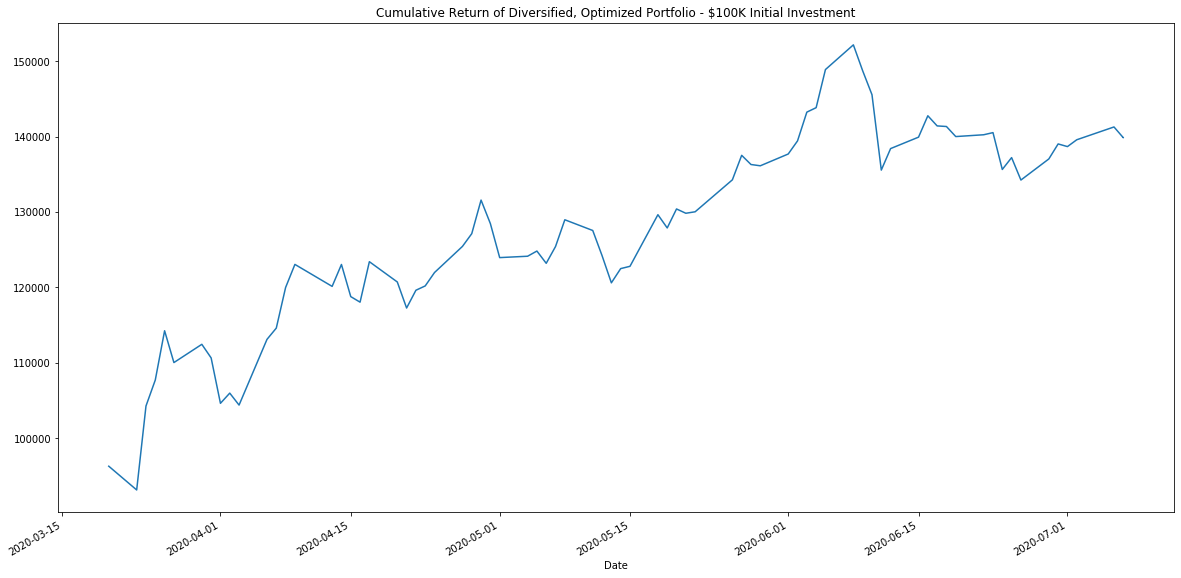

In [57]:
# Calculate Cumulative Optimized Portfolio Returns, and Plot $100,000 Investment Over Time for Optimized Portfolio
weights = []
for ticker in op_daily_returns:
    weights.append(1/len(op_daily_returns.columns))
op_portfolio_returns = op_daily_returns.dot(weights)
op_cum_portfolio_return = (1 + op_portfolio_returns).cumprod()
in_inv = 100000
op_cum_port_rtn_val = (op_cum_portfolio_return * in_inv)
op_cum_port_rtn_val.plot(kind='line',figsize=(20,10),title='Cumulative Return of Diversified, Optimized Portfolio - $100K Initial Investment');

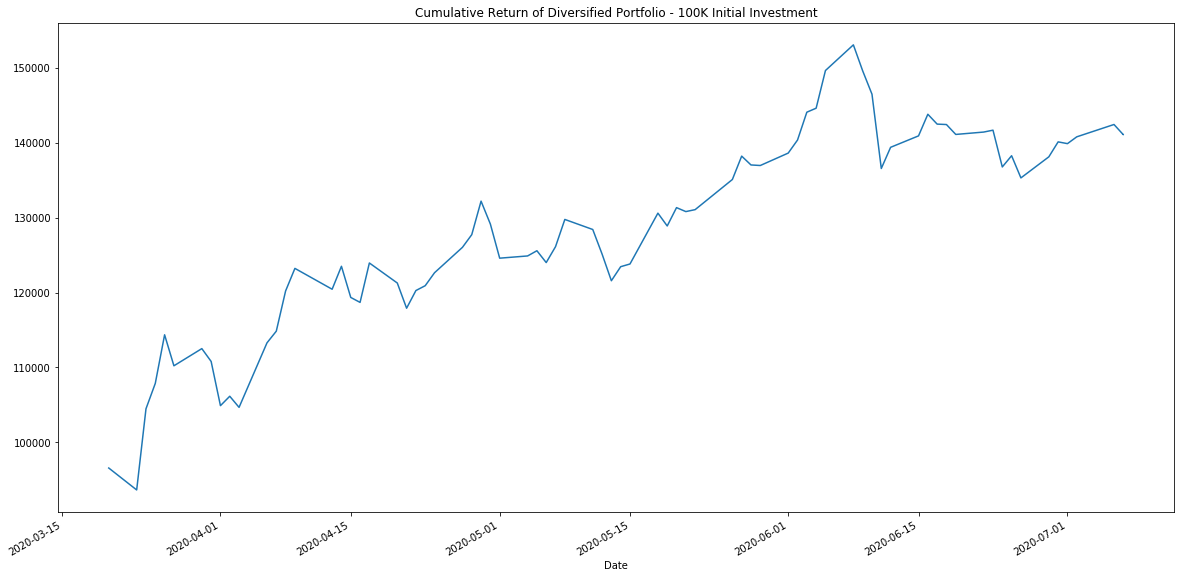

In [58]:
# Calculate Cumulative Returns of Optimized, Diversified Portfolio, and Plot $100,000 Investment
weights = []
for ticker in dv_daily_returns:
    weights.append(1/len(dv_daily_returns.columns))
dv_portfolio_returns = dv_daily_returns.dot(weights)
dv_cum_rtn_port = (1 + dv_portfolio_returns).cumprod()
in_inv = 100000
dv_cum_rtn_port_val = (dv_cum_rtn_port * in_inv)
dv_cum_rtn_port_val.plot(kind='line',figsize=(20,10),title='Cumulative Return of Diversified Portfolio - 100K Initial Investment');

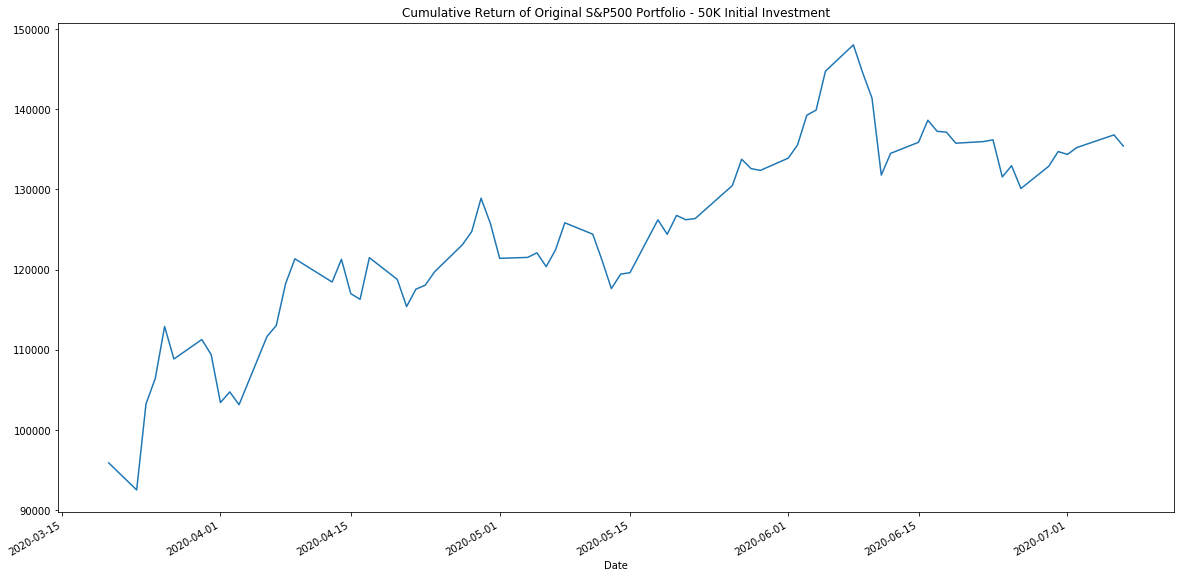

In [59]:
# Calculate Cumulative Returns for the original S&P500 portfolio, and Plot $500,000 Investment
weights = []
for ticker in daily_returns:
    weights.append(1/len(daily_returns.columns))
portfolio_returns = daily_returns.dot(weights)
cum_rtn_port = (1 + portfolio_returns).cumprod()
in_inv = 100000
cum_rtn_port_val = (cum_rtn_port * in_inv)
cum_rtn_port_val.plot(kind='line',figsize=(20,10),title='Cumulative Return of Original S&P500 Portfolio - 50K Initial Investment');

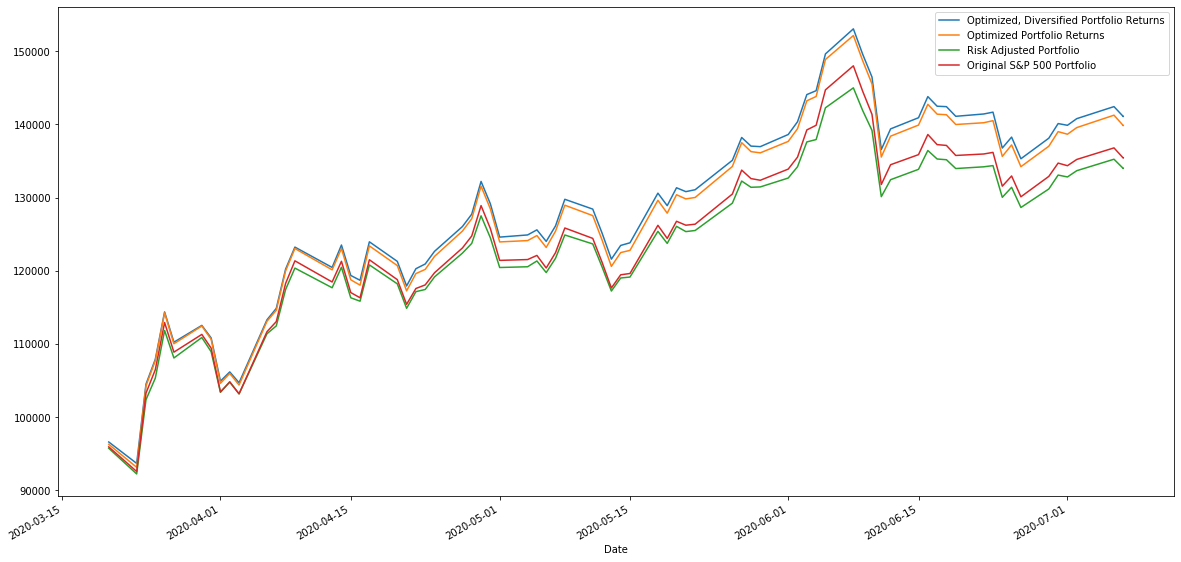

In [64]:
# Overlay the main hypothetical portfolios, with an initial investment of $500K
ax = dv_cum_rtn_port_val.plot(figsize=(20,10))
op_cum_port_rtn_val.plot(ax=ax)
ra_cumulative_profit.plot(ax=ax)
cum_rtn_port_val.plot(ax=ax)

ax.legend(['Optimized, Diversified Portfolio Returns',
           'Optimized Portfolio Returns',
           'Risk Adjusted Portfolio',
           'Original S&P 500 Portfolio']);
